# 01 – Exploratory Data Analysis: Cash Conversion Cycle (CCC)

This notebook explores synthetic and raw data to compute:
- Days Sales Outstanding (DSO)
- Days Payables Outstanding (DPO)
- Days Inventory Outstanding (DIO)
- Cash Conversion Cycle (CCC)

The goal is to **quantify working-capital efficiency** and identify improvement levers.

In [ ]:
# Easy fix for finding parent directory modules
import sys, os
sys.path.append(os.path.abspath(".."))

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from value_ops_lab.synth import make_synthetic
from value_ops_lab.ccc import dso, dpo, dio, ccc

# Generate synthetic dataset
df = make_synthetic(n_months=24)

# Build inputs
sales_df = df[["month","sales"]]
cogs_df = df[["month","cogs"]]

dso_df = dso(df[["month","ar_balance"]], sales_df)
dpo_df = dpo(df[["month","ap_balance"]], cogs_df)
dio_df = dio(df[["month","inventory"]], cogs_df)

ccc_df = ccc(dso_df, dpo_df, dio_df)
ccc_df.head()

,month,DSO,DPO,DIO,CCC
0,2023-01-01,84.227627,49.188779,57.500410,92.539258
1,2023-02-01,111.914775,53.616682,77.038558,135.336651
2,2023-03-01,99.553833,73.976753,47.177966,72.755046
3,2023-04-01,75.371605,65.473851,41.339946,51.237700
4,2023-05-01,92.358458,49.311888,67.939757,110.986327


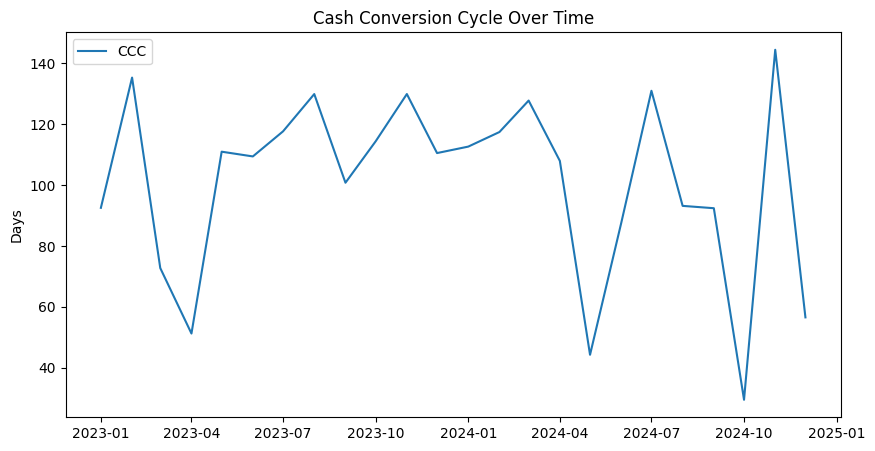

In [5]:
# Plot CCC over time
plt.figure(figsize=(10,5))
plt.plot(ccc_df["month"], ccc_df["CCC"], label="CCC")
plt.title("Cash Conversion Cycle Over Time")
plt.ylabel("Days")
plt.legend()
plt.show()

### Key Insight
- High CCC → more cash tied up.
- Improving DSO/DPO/DIO can unlock liquidity.